Check the in-situ stations in the HMA region.

In [10]:
import cartopy.crs as ccrs
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

In [ ]:
path_hma_gtng = 'data/hma-extent/HMA/hma_gtng_202307_subregions.gpkg'
path_hma_region_lake = 'data/water-extent/lakes/HydroLakes_v10_hma_region.gpkg' 
path_insitu_station = 'data/ground-observation/hydro_station.gpkg'
path_save = 'figures/ground-observation/hydro_station_loc.png'

In [13]:
### read in data
hma_gdf = gpd.read_file(path_hma_gtng)
hma_insitu = gpd.read_file(path_insitu_station)
hma_lakes = gpd.read_file(path_hma_region_lake)
hma_insitu.head(3)


,lake_name,geometry
0,Zhari Namco,POINT (85.61 30.93)
1,DawaCo,POINT (84.96 31.24)
2,DazegCo,POINT (87.53 31.89)


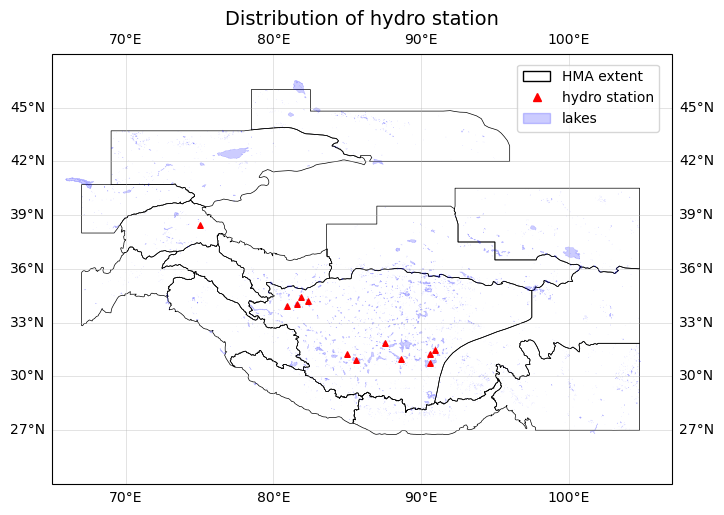

In [ ]:
## Lakes
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([65.0, 107.0, 24.0, 46.0])
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5)

# add region boundaries
hma_gdf.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=0.5)

# add lake boundaries
hma_lakes.plot(ax=ax, edgecolor='blue', facecolor='blue', 
                                            alpha=0.2, linewidth=0.3)

# In-situ distribution of sites
hma_insitu.plot(ax=ax, marker='^', markersize=15, 
                    color='red', transform=ccrs.PlateCarree())

# ## add legend and gridlines
legend_patches = [
    mpatches.Patch(edgecolor='black', facecolor='none', label='HMA extent', linewidth=1),
    Line2D([0], [0], marker='^', color='red', markersize=6, 
                                label='hydro station', linestyle='None'),
    mpatches.Patch(edgecolor='blue', facecolor='blue', label='lakes', linewidth=1, alpha=0.2),
]
ax.legend(handles=legend_patches, loc=(0.75, 0.82))
ax.set_title('Distribution of hydro station', fontsize=14)
plt.savefig(path_save, dpi=300, bbox_inches='tight', facecolor='white')
